#  **Project Title: Predicting Track Genre Using Audio Features**

# Business Question:
Can we predict the genre of a track based solely on its audio features?

# Project Objective:
The goal of this project is to develop a machine learning model that classifies Spotify tracks into specific genres using audio features such as danceability, energy, acousticness, tempo, and more.

 By successfully building this model, we aim to help music platforms, producers, or listeners better categorize music and recommend tracks based on similar genres.

# Approach:
Exploratory Data Analysis (EDA): We will analyze the dataset to understand feature distributions, relationships between features, and any data cleaning that might be required.

Feature Selection and Engineering: Select the most relevant features (like tempo, valence, and danceability) and prepare the dataset for training.

Model Building: We will test multiple classification algorithms, such as Decision Trees, Random Forests, and Logistic Regression, to predict the genre of the track.

Model Evaluation: Evaluate model performance using accuracy, precision, recall, and other relevant metrics.

# **Team members**

# Ortal Lasry

# Or Cohen Raviv

## **Table of contents**

1. Introduction
2. Exploratory Data Analysis (EDA)

____2.1 Data Loading and Initial Inspection

____2.2 Data Cleansing

____2.3 Data Cleaning

____2.4 Visualization Before and After Cleaning

____2.5 Correlation Analysis

3. Feature Selection and Engineering

4. Model Comparison (Random Forest, SVM, Desicion Tree, Logistic Regression) NOTEBOOK A
      - impact of feature engeneering and class balancing (SMOTE/ using balanced portion of the data/ Clustering + SMOTE) on the models - NOTEBOOK A (the link to the notebook is clickable, and will direct you to the notebook)

5. Model Building

____5.1 Logistic Regression

____5.2 Random Forest Classifier

____5.3 Model evaluation

_______5.3.1  Feature Importance


5. Random Forest with Transformed Variables

6. Voting + Random Forest + XGBoost

7. Summarizing accuracy level for all models

# .1.  **Introduction**


**Data set** used for analysis was found on Kaggle -
https://www.kaggle.com/datasets/priyamchoksi/spotify-dataset-114k-songs

# **Spotify Tracks Dataset Description:**

This dataset contains information on Spotify tracks spanning 125 different genres. Each track is described by various audio features and metadata. The dataset can be utilized for:

Building recommendation systems based on user preferences or inputs.
Classification tasks based on audio features and genre categorization.

# **Columns Description:**

**track_id:** The unique Spotify ID for each track.

**artists:** Names of the artists who performed the track, separated by ';'.

**album_name:** The name of the album in which the track appears.

**track_name:** The title of the track.

**popularity:** A value between 0 and 100, indicating the track's popularity based on recent plays.

**duration_ms:** The length of the track in milliseconds.

**explicit:** Boolean indicating whether the track contains explicit content.

**danceability:** Describes how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).

**energy:** Represents the intensity and activity of a track (0.0 = low energy, 1.0 = high energy).

**key:** The musical key of the track mapped using standard Pitch Class notation.

**loudness:** Overall loudness of the track in decibels (dB).

**mode:** Indicates the modality (major or minor) of the track.

**speechiness:** Detects the presence of spoken words in the track.

**acousticness:** Confidence measure of whether the track is acoustic (0.0 = not acoustic, 1.0 = highly acoustic).

**instrumentalness:** Predicts whether a track contains vocals (0.0 = contains vocals, 1.0 = instrumental).

**liveness:** Detects the presence of an audience in the recording (0.0 = studio recording, 1.0 = live performance).

**valence:** Measures the musical positiveness conveyed by a track (0.0 = negative, 1.0 = positive).

**tempo:** Estimated tempo of the track in beats per minute (BPM).

**time_signature:** Estimated time signature of the track (3 to 7).

Each track is associated with a specific genre labeled under **track_genre**.




# .2. **Exploratory Data Analysis (EDA)**


## 2.1 **Data Loading and Initial Inspection**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import regex as re
import seaborn as sns

In [26]:
def csv_drive_path_generator(url):
    """
    Generates a direct download link from a Google Drive URL to read CSV files.

    Args:
    url (str): Google Drive sharing link for the CSV file.

    Returns:
    str: Direct link to download the CSV file.
    """
    # Extract the file ID from the Google Drive link
    file_id = url.split('/')[-2]
    # Create a direct download link
    path = f'https://drive.google.com/uc?export=download&id=1lVktfiPQa6R5nqWpPKDLMLWIolDZgiUk'

    return path


In [27]:
import pandas as pd


# Replace this with your Google Drive file link
drive_link = 'https://drive.google.com/file/d/1lVktfiPQa6R5nqWpPKDLMLWIolDZgiUk/view?usp=sharing'

# Generate the direct download link
csv_path1 = csv_drive_path_generator(drive_link)

# Read the CSV directly into a DataFrame
df = pd.read_csv(csv_path1)

# Display the first few rows to confirm it's loaded correctly
df.head()

# Get an overview of the dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [28]:

print("~"*100)
# Check for Missing Values
print(df.isna().sum())
#missing values in the following featureas: 'artists', 'album_name','track_name'. Later we will drop the missing values.


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [29]:

#We want to see the min-max values for the different quantitiative features:

for column in df.select_dtypes(include='number').columns:
    print(f"{column} - Min: {df[column].min()}, Max: {df[column].max()}")


#There is a variation in the scale for the different features, Later we will standardized/scale them.


Unnamed: 0 - Min: 0, Max: 113999
popularity - Min: 0, Max: 100
duration_ms - Min: 0, Max: 5237295
danceability - Min: 0.0, Max: 0.985
energy - Min: 0.0, Max: 1.0
key - Min: 0, Max: 11
loudness - Min: -49.531, Max: 4.532
mode - Min: 0, Max: 1
speechiness - Min: 0.0, Max: 0.965
acousticness - Min: 0.0, Max: 0.996
instrumentalness - Min: 0.0, Max: 1.0
liveness - Min: 0.0, Max: 1.0
valence - Min: 0.0, Max: 0.995
tempo - Min: 0.0, Max: 243.372
time_signature - Min: 0, Max: 5


In [30]:
df['explicit'].value_counts() #Less then 10% of the df has explicit=TRUE(bad words/not for children)

,count
explicit,
False,104253
True,9747


In [31]:
# Check if the 'explicit' column contains any non-boolean values
non_bool_values = ~df['explicit'].isin([True, False])

# Display rows with non-boolean values in 'explicit' column
df[non_bool_values]
#There are 0 non-boolean values in explicit

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [32]:
#Need to change explicit from Boolean type to int for later analytics:
df['explicit'] = df['explicit'].map({True: 1, False: 0})

df['explicit'].unique()




array([0, 1])

In [33]:
df['explicit'].value_counts()

,count
explicit,
0,104253
1,9747


In [34]:
# Convert the 'speechiness' column to numeric, setting non-numeric values to NaN
non_numeric_values = pd.to_numeric(df['speechiness'], errors='coerce')

# Check for rows where 'speechiness' contains non-numeric values
non_numeric_rows = df[non_numeric_values.isna()]

# Display rows with non-numeric values in 'speechiness' column
non_numeric_rows


#There are 0 non_numeric_rows in speechiness
df['speechiness'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 114000 entries, 0 to 113999
Series name: speechiness
Non-Null Count   Dtype  
--------------   -----  
114000 non-null  float64
dtypes: float64(1)
memory usage: 890.8 KB


In [35]:

# Same here: Convert the 'loudness' column to numeric, setting non-numeric values to NaN
non_numeric_values2 = pd.to_numeric(df['loudness'], errors='coerce')

# Check for rows where 'loudness' contains non-numeric values
non_numeric_rows2 = df[non_numeric_values2.isna()]

# Display rows with non-numeric values in 'loudness' column
print(non_numeric_rows2)
df['loudness'].info()


Empty DataFrame
Columns: [Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []

[0 rows x 21 columns]
<class 'pandas.core.series.Series'>
RangeIndex: 114000 entries, 0 to 113999
Series name: loudness
Non-Null Count   Dtype  
--------------   -----  
114000 non-null  float64
dtypes: float64(1)
memory usage: 890.8 KB


In [36]:

# Convert the 'tempo' column to numeric type
df['tempo'] = pd.to_numeric(df['tempo'])

# Convert the 'valence' column to numeric type
df['valence'] = pd.to_numeric(df['valence'])

In [16]:


# Convert the 'popularity' column to numeric type because of NaN types recognized in this column
df['popularity'] = pd.to_numeric(df['popularity'])

df['popularity'].isnull().sum()



0

In [17]:

######## looking for missing values-we saw in the info that there are missing values in the folowing variables:
# 'album_name', 'artists',  'track_name'. We want to see how many missing values in each feature:


column_name = 'album_name'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)



column_name = 'artists'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list for easier use or display
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)

#########
# Specify the column you are interested in
column_name = 'track_name'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list for easier use or display
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)

#########

#We will drop them in the data cleaning




Indices with missing values in column 'album_name':
[65900]
Indices with missing values in column 'artists':
[65900]
Indices with missing values in column 'track_name':
[65900]


## 2.2 **Data cleansing**

Checking duplicates for track_id

In [37]:

# Check for duplicate values in the 'track_id' column
df[df['track_id'].duplicated(keep=False)]

# 40900 DUPLICATES in track_id#######

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,0,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,0,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,0,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113572,113572,1saXUvvFlAQaefZUFVmhCn,Bethel Music;Paul McClure,We Will Not Be Shaken (Live),Jesus We Love You - Live,53,415079,0,0.253,0.3590,...,-8.482,1,0.0317,0.3100,0.000006,0.3590,0.1150,115.348,3,world-music
113605,113605,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,0,0.490,0.2310,...,-13.968,1,0.0265,0.6070,0.000000,0.0859,0.0904,103.958,4,world-music
113617,113617,71dLJx3qHOTQMTvvoE2dmd,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,0,0.515,0.0736,...,-15.492,1,0.0310,0.9750,0.000261,0.0820,0.0684,109.964,4,world-music
113619,113619,6OG5TBCmuTOuWCzSGsETrE,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,0,0.624,0.1240,...,-11.191,1,0.0280,0.9170,0.000000,0.1200,0.2060,78.014,4,world-music


In [38]:
# Find unique track_id values that are duplicated
df['track_id'][df['track_id'].duplicated()].unique()



array(['0CDucx9lKxuCZplLXUz0iX', '2aibwv5hGXSgw7Yru8IYTO',
       '5E30LdtzQTGqRvNd7l6kG5', ..., '71dLJx3qHOTQMTvvoE2dmd',
       '6OG5TBCmuTOuWCzSGsETrE', '7xsirhcgFWOnItsGuBfrv9'], dtype=object)

In [39]:

#We want to see how many duplicates there are in the track_id
#  Get the count of all track_ids
track_id_counts = df['track_id'].value_counts()

# Filter out track_ids that appear more than once (i.e., duplicates)
duplicated_track_id_summary = track_id_counts[track_id_counts > 1]

# Display the count of duplicated track_ids
print(duplicated_track_id_summary)

#16641 number of unique track_ids that have duplicates

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
5ZsAhuQ24mWHiduaxJqnhW    7
08kTa3SL9sV6Iy8KLKtGql    7
                         ..
2a05MFdR1vtm8QVKFs1SGn    2
2BJdsyqP0IfOt0GR2a6zJl    2
7oyFihJppZYPP7o0NfoHnZ    2
0oz7Ia8lnWttkXi2TBc1Rd    2
1cbCEtcGU25HvwMrZDPqJy    2
Name: count, Length: 16641, dtype: int64


In [40]:
# Drop duplicate rows based on the 'track_id' column, keeping only the first occurrence
df_cleaned = df.drop_duplicates(subset=['track_id'], keep='first')

# Check the shape of the cleaned DataFrame to see how many rows remain
print(df_cleaned.shape)
#(89741, 20) rows*colums


# 40900 (All duplicates)- 24,259 (duplicate track_id rows except the first instance of each unique track_id)=16641 (unique track_id)

#114000-24,259= 89741

(89741, 21)


In [41]:
 # Should return 0 if all duplicates were removed
print(df_cleaned['track_id'].duplicated().sum())


0


In [42]:
df_cleaned.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [43]:
# Remove rows with missing data
df_cleaned = df.dropna()


## 2.3 **Data Cleaning**

In [48]:


#This part of data cleaning is from the first exercise.
# It is less important becuase in this exercise we are not using 'album_name', 'artists' ,'track_name'.


#####cleanup of jibrish and missing indices album_name column######

# Specify the column you are interested in
column_name = 'album_name'

# Use a regular expression to check for at least one alphabetic character
df_cleaned = df_cleaned[df_cleaned[column_name].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Function to check if a string contains only numbers
def is_numeric_string(s):
    return str(s).isdigit()

# Function to check if a string contains at least one alphabetic character from any language
def has_alphabetic_char(s):
    return bool(re.search(r'\p{L}', str(s)))

# Identify rows where the 'album_name' contains only numbers
numeric_rows = df[df['album_name'].apply(is_numeric_string)]

# Ensure the rows are unique
unique_numeric_rows = numeric_rows.drop_duplicates()

# Identify rows where the 'album_name' contains at least one alphabetic character from any language
alphabetic_rows = df[df['album_name'].apply(has_alphabetic_char)]

# Ensure these rows are unique
unique_alphabetic_rows = alphabetic_rows.drop_duplicates()

# Ensure these rows are not already present in df_cleaned
new_numeric_rows = unique_numeric_rows[~unique_numeric_rows.isin(df_cleaned)].dropna()
new_alphabetic_rows = unique_alphabetic_rows[~unique_alphabetic_rows.isin(df_cleaned)].dropna()

# Add these unique rows back to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, new_numeric_rows, new_alphabetic_rows])

# Remove any duplicates that might have been introduced during concatenation
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)



#####cleanup of jibrish and missing indices for artists column######


# Specify the column you are interested in
column_name = 'artists'

# Use a regular expression to check for at least one alphabetic character
df_cleaned = df_cleaned[df_cleaned[column_name].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Function to check if a string contains only numbers
def is_numeric_string(s):
    return str(s).isdigit()

# Function to check if a string contains at least one alphabetic character from any language
def has_alphabetic_char(s):
    return bool(re.search(r'\p{L}', str(s)))

# Identify rows where the 'artists' contains only numbers
numeric_rows = df[df['artists'].apply(is_numeric_string)]

# Ensure the rows are unique
unique_numeric_rows = numeric_rows.drop_duplicates()

# Identify rows where the 'artists' contains at least one alphabetic character from any language
alphabetic_rows = df[df['artists'].apply(has_alphabetic_char)]

# Ensure these rows are unique
unique_alphabetic_rows = alphabetic_rows.drop_duplicates()

# Ensure these rows are not already present in df_cleaned
new_numeric_rows = unique_numeric_rows[~unique_numeric_rows.isin(df_cleaned)].dropna()
new_alphabetic_rows = unique_alphabetic_rows[~unique_alphabetic_rows.isin(df_cleaned)].dropna()

# Add these unique rows back to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, new_numeric_rows, new_alphabetic_rows])

# Remove any duplicates that might have been introduced during concatenation
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

# Remove rows with missing data
df_cleaned = df.dropna()

#####cleanup of jibrish and missing indices for track_name column######

# Specify the column you are interested in
column_name = 'track_name'

# Use a regular expression to check for at least one alphabetic character
df_cleaned = df_cleaned[df_cleaned[column_name].apply(lambda x: bool(re.search('[a-zA-Z]', str(x))))]

# Function to check if a string contains only numbers
def is_numeric_string(s):
    return str(s).isdigit()

# Function to check if a string contains at least one alphabetic character from any language
def has_alphabetic_char(s):
    return bool(re.search(r'\p{L}', str(s)))

# Identify rows where the 'track_name' contains only numbers
numeric_rows = df[df['track_name'].apply(is_numeric_string)]

# Ensure the rows are unique
unique_numeric_rows = numeric_rows.drop_duplicates()

# Identify rows where the 'track_name' contains at least one alphabetic character from any language
alphabetic_rows = df[df['track_name'].apply(has_alphabetic_char)]

# Ensure these rows are unique
unique_alphabetic_rows = alphabetic_rows.drop_duplicates()

# Ensure these rows are not already present in df_cleaned
new_numeric_rows = unique_numeric_rows[~unique_numeric_rows.isin(df_cleaned)].dropna()
new_alphabetic_rows = unique_alphabetic_rows[~unique_alphabetic_rows.isin(df_cleaned)].dropna()

# Add these unique rows back to the cleaned DataFrame
df_cleaned = pd.concat([df_cleaned, new_numeric_rows, new_alphabetic_rows])

# Remove any duplicates that might have been introduced during concatenation
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


###### Verify the changes######
print("Cleaned_dataset after cleanup of jibrish and missing indices:")
print("    ")
print(df_cleaned)

print("~"*200)
print("Proving the missing indices have been removed:")
single_row = df_cleaned.loc[65899:65901, :]
print(type(single_row))
print(single_row)

print("~"*200)
print("The first cleanup of the dataframe:")
print(df_cleaned.info())

#######comparing between the original dataset and the first cleaned dataset########

df_original_dataset = pd.read_csv(csv_path1)

# Compare the shape of the datasets
print("comparing between the data shapes before and after cleanup:")
print("Original dataset shape:", df_original_dataset.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

print("~"*200)

# Check the distribution of a key feature (e.g., track_genre)

original_genre_distribution = df_original_dataset['track_genre'].value_counts(normalize=True)
cleaned_genre_distribution = df_cleaned['track_genre'].value_counts(normalize=True)

print("~"*200)
print("Original genre distribution:")
print(original_genre_distribution)

print("Cleaned genre distribution:")
print(cleaned_genre_distribution)

# Compare the mean popularity before and after cleaning

original_mean_popularity = df_original_dataset['popularity'].mean()
cleaned_mean_popularity = df_cleaned['popularity'].mean()

print("~"*200)
print("comparing between the mean popularity before and after cleanup:")
print("Original mean popularity:", original_mean_popularity)
print("Cleaned mean popularity:", cleaned_mean_popularity)

print("~"*200)
print("You can see there is no big change in mean popularity before and after cleanup, meaning the cleanup didn't impact the data.")

######filtering the data from unwanted duplicates######

# Group by 'track_name'
grouped = df_cleaned.groupby('track_name')

# Filter groups where all entries have the same 'artists' string
filtered_groups = grouped.filter(lambda x: len(x['artists'].unique()) == 1)

df = pd.read_csv(csv_path1)
print(df['duration_ms'])

# Convert the 'duration_ms' column to numeric type
df['duration_ms'] = pd.to_numeric(df['duration_ms'])

# Perform aggregation: mean popularity and mean duration
aggregated = filtered_groups.groupby('track_name').agg({
    'popularity': 'mean',
    'duration_ms': 'mean'
}).reset_index()

# Count the number of songs including duplicate songs with same relevant data after agregation of groupby
#This also equals the length of rows in cleaned_dataset.csv
same_name_count = df_cleaned['track_name'].value_counts()

# Count the number of songs with the same name and same artists
same_name_artist_count = df_cleaned.groupby(['track_name', 'artists']).size().reset_index(name='count')

# Save the aggregated DataFrame to a new CSV file
aggregated.to_csv('aggregated_dataset.csv', index=False)
print("~"*100)
print("This is the full aggregated data")
print(aggregated)
print("~"*100)
# Display the results
print("Number of songs with the same name:")
print(same_name_count[same_name_count > 1])  # Show only duplicates
print("~"*100)
print("\nNumber of songs with the same name and same artists:")
print(same_name_artist_count[same_name_artist_count['count'] > 1])  # Show only duplicates

#### Choose a track name (to demonstarte how duplicates of one track_name look like)
track_name_to_check = "La Bachata"
print("~"*100)
# Data before filtering and aggregation
original_data = df_cleaned[df_cleaned['track_name'] == track_name_to_check]
print("Original cleaned Data for a specific song - for demonstration of duplicates before filtering it:")
print(original_data)
print("~"*100)
# Data after filtering and aggregation
aggregated_data = aggregated[aggregated['track_name'] == track_name_to_check]
print("\nAggregated Data of the specific song selected for demonstraion after filtering duplicates:")
print(aggregated_data)

# Function to check for differences in specified columns
def check_differences(group, columns):
    for column in columns:
        if group[column].nunique() > 1:
            return True
    return False

# Columns to check for differences
columns_to_check = [ 'tempo', 'valence', 'popularity']

# Group by 'track_name' and check for differences
same_name_diff = df_cleaned.groupby('track_name').filter(lambda x: check_differences(x, columns_to_check))

# Group by 'track_name' and 'artists' and check for differences
same_name_artist_diff = df_cleaned.groupby(['track_name', 'artists']).filter(lambda x: check_differences(x, columns_to_check))
print("~"*100)
# Display results
print("Songs with the same name that have differences in 'tempo', 'valence', or 'popularity':")
print(same_name_diff[['track_name', 'artists', 'tempo', 'valence', 'popularity']].drop_duplicates())
print("~"*100)
print("\nSongs with the same name and same artists that have differences in 'tempo', 'valence', or 'popularity':")
print(same_name_artist_diff[['track_name', 'artists', 'tempo', 'valence', 'popularity']].drop_duplicates())

# Function to check if all rows have the same values for the specified columns
def check_all_same(group, columns):
    return group[columns].nunique().eq(1).all()

# Columns to check for equality
columns_to_check = ['tempo', 'valence', 'popularity']

# Identify rows to keep (for songs with same name and same artists with different values)
#This are rows with same track_name, meaning duplicates, but with different data, making them unique duplicates.
rows_to_keep = df_cleaned.groupby(['track_name', 'artists']).filter(
    lambda x: not check_all_same(x, columns_to_check)
)
print("~"*100)
# Display the resulting DataFrame
print("rows to keep and add to the cleaned dataset, to create final cleaned csv file:")
print(rows_to_keep)

# Save the resulting DataFrame to a new CSV file
rows_to_keep.to_csv('rows_to_keep_dataset.csv', index=False)

df_cleaned = df_cleaned.groupby('track_name').agg('first').reset_index()
print("~"*100)
# Display the resulting DataFrame
print("Cleaned_dataset after full agregation of duplicates (before filtering them):")
print(df_cleaned)

# Save again the cleaned dataset and now also filtered (after agregation by same track_name)
df_cleaned.to_csv('cleaned_dataset.csv', index=False)
print("~"*100)
print("Cleaned_dataset after full agregation of duplicates (afterrr filtering them):")
print(df_cleaned)
print("~"*100)

# Get unique track names in rows_to_keep
unique_track_names = rows_to_keep['track_name'].unique()

# Remove all rows with these track names from the original dataset
cleaned_df = df_cleaned[~df_cleaned['track_name'].isin(unique_track_names)]

# Append rows_to_keep to cleaned_df
final_df = pd.concat([cleaned_df, rows_to_keep])
print("~"*100)
# Display the final DataFrame
print("final cleaned dataset:")
print(final_df)

# Save the final DataFrame to a new CSV file
final_df.to_csv('final_clean_dataset.csv', index=False)

Cleaned_dataset after cleanup of jibrish and missing indices:
    
        Unnamed: 0                track_id                 artists  \
0              0.0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1              1.0  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2              2.0  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3              3.0  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4              4.0  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
109970    109970.0  3YuGN3KB1ThbXssueLCuJt           Kyoko Koizumi   
109985    109985.0  4IGxA3ztKdZdTcFH79Xe9E           Seiko Matsuda   
109986    109986.0  515BPozxiMm95vvsA6V6En           Seiko Matsuda   
109993    109993.0  1t0nwk5GRdT3frkWp15qSl          Akina Nakamori   
113856    113856.0  6XsYJ0dwT2hRzp0Qles78F       Колыбельная-земля   

                                               album_name  \
0                              

**These are the columns I want to drop from the DF**

In [49]:

#In the previous version of the file we contineued with only 5 features but the model was
#too much simple and thus with high level of accuracy. This time we will contineu with 9 features.
columns_to_remove = ['artists', 'album_name', 'track_name', 'popularity', 'mode',
                     'liveness', 'time_signature', 'valence', 'key']
# Remove the columns
final_df = final_df.drop(columns_to_remove, axis=1)
final_df.head()

,Unnamed: 0,track_id,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,track_genre
0,36750.0,0fROT4kK5oTm8xO8PX6EJF,178533.0,1.0,0.823,0.6120,-7.767,0.2480,0.168,0.00000,142.959,french
1,92751.0,1hH0t381PIXmUVWyG1Vj3p,151680.0,0.0,0.615,0.3750,-10.362,0.0319,0.482,0.00000,110.720,rockabilly
2,66970.0,1B45DvGMoFWdbAEUH2qliG,84305.0,0.0,0.553,0.8120,-5.542,0.0558,0.132,0.00001,118.368,kids
3,66996.0,73lXf5if6MWVWnsgXhK8bd,86675.0,0.0,0.664,0.6110,-8.687,0.0886,0.120,0.00000,118.443,kids
4,101161.0,0jmz4aHEIBCRgrcV2xEkwB,289133.0,0.0,0.111,0.0568,-28.053,0.0551,0.990,0.69700,169.401,sleep


In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87967 entries, 0 to 109986
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        87967 non-null  float64
 1   track_id          87967 non-null  object 
 2   duration_ms       87967 non-null  float64
 3   explicit          87967 non-null  float64
 4   danceability      87967 non-null  float64
 5   energy            87967 non-null  float64
 6   loudness          87967 non-null  float64
 7   speechiness       87967 non-null  float64
 8   acousticness      87967 non-null  float64
 9   instrumentalness  87967 non-null  float64
 10  tempo             87967 non-null  float64
 11  track_genre       87967 non-null  object 
dtypes: float64(10), object(2)
memory usage: 8.7+ MB


In [51]:
# Check for duplicate rows across all columns in final_df
duplicates_all_columns = final_df[final_df.duplicated(keep=False)]

# Display the duplicate rows
print("Duplicate rows across all columns:")
print(duplicates_all_columns)

# Count the number of duplicate rows
num_duplicates = final_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
#No duplicates in the final_df####

Duplicate rows across all columns:
Empty DataFrame
Columns: [Unnamed: 0, track_id, duration_ms, explicit, danceability, energy, loudness, speechiness, acousticness, instrumentalness, tempo, track_genre]
Index: []
Number of duplicate rows: 0


In [52]:
#We want to see all the music geners in the df
print(final_df['track_genre'].unique())


['french' 'rockabilly' 'kids' 'sleep' 'power-pop' 'anime' 'romance'
 'piano' 'german' 'classical' 'show-tunes' 'british' 'ska' 'acoustic'
 'idm' 'hardstyle' 'electronic' 'emo' 'alternative' 'latin' 'punk-rock'
 'j-idol' 'trip-hop' 'country' 'club' 'comedy' 'detroit-techno' 'chill'
 'happy' 'folk' 'honky-tonk' 'opera' 'guitar' 'goth' 'disney' 'new-age'
 'bluegrass' 'mandopop' 'rock' 'rock-n-roll' 'blues' 'death-metal' 'jazz'
 'synth-pop' 'reggae' 'disco' 'industrial' 'garage' 'dub' 'grindcore'
 'dancehall' 'funk' 'j-pop' 'spanish' 'salsa' 'iranian' 'metalcore'
 'alt-rock' 'hip-hop' 'soul' 'k-pop' 'techno' 'house' 'black-metal'
 'chicago-house' 'trance' 'psych-rock' 'pagode' 'j-dance' 'study' 'brazil'
 'world-music' 'hardcore' 'children' 'ambient' 'gospel' 'sertanejo' 'punk'
 'party' 'groove' 'forro' 'afrobeat' 'turkish' 'heavy-metal' 'edm' 'indie'
 'latino' 'hard-rock' 'singer-songwriter' 'cantopop' 'drum-and-bass'
 'minimal-techno' 'indie-pop' 'grunge' 'electro' 'swedish' 'metal'
 'bre

In [53]:
#We want to see all the music geners in the df
print(final_df['track_genre'].nunique())
#There are 114 different  music geners in the df. This is too much in order to draw insights from the data.


114


<ipython-input-54-03b042d2af5a>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)


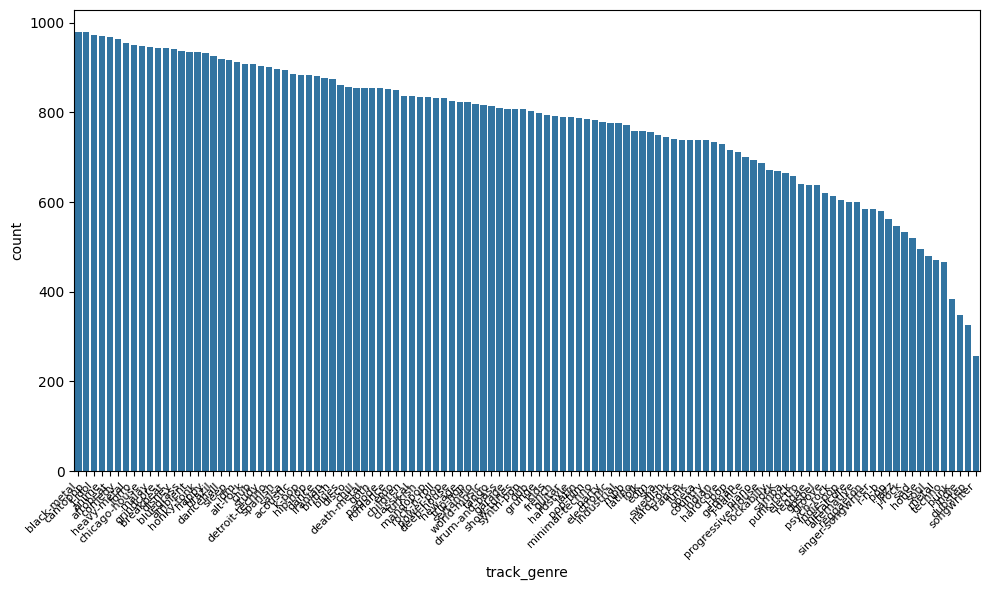

In [54]:
#Lets visualise all 'track_genre' types:

import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))


sns.countplot(
    x='track_genre',
    data=final_df,
    ax=ax,
    order=final_df['track_genre'].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()




From the graph above we can draw two  main conclusions:
a. Some music genres have more track_id entries than others, making the data unbalanced.
b. There are too many music genres for the human eye to easily interpret patterns.
Additionally, some genres overlap in their characteristics with broader genres.
For example, 'rock', 'rock-n-roll', and 'alt-rock' are different subgenres that fall under the broader category of rock. Hence, we decided to group them.


In [55]:
# Therefore, in the following steps, we decided to group track_genre into 10 broader categories.

# Define genres for each group
electronic_genres=['electronic', 'idm', 'hardstyle', 'detroit-techno', 'chill', 'club', 'trance', 'deep-house', 'minimal-techno', 'dubstep', 'techno', 'progressive-house', 'house',
    'garage', 'disco', 'dance', 'chicago-house', 'edm', 'dancehall', 'drum-and-bass', 'breakbeat', 'trip-hop','j-dance', 'ambient', 'electro']

pop_genres=['pop', 'power-pop', 'synth-pop', 'indie-pop', 'singer-songwriter', 'j-pop', 'k-pop', 'cantopop', 'pop-film','j-idol']

rock_genres = ['rock', 'rock-n-roll', 'alt-rock', 'alternative', 'hard-rock', 'metal', 'heavy-metal', 'black-metal', 'death-metal', 'metalcore',
      'grunge', 'emo', 'psych-rock', 'hardcore', 'goth', 'industrial', 'punk', 'punk-rock', 'grindcore', 'j-rock','indie']

hiphop_genres = ['hip-hop', 'r-n-b', 'rap', 'soul']

world_genres = ['latin', 'latino', 'reggae', 'salsa', 'samba', 'brazil', 'forro', 'afrobeat', 'pagode', 'tango', 'french', 'german', 'british', 'iranian', 'indian', 'turkish', 'world-music', 'mandopop', 'mpb', 'malay', 'spanish','swedish']

Classical_Instrumental=['classical', 'piano', 'guitar']

jazz_blues_genres = ['jazz', 'blues', 'funk', 'groove', 'soul','acoustic', 'gospel']

Country_Folk=['country', 'folk', 'honky-tonk', 'bluegrass','rockabilly', 'sertanejo']

Specialty_Other= ['anime', 'show-tunes', 'opera', 'comedy', 'disney', 'new-age', 'children', 'study', 'happy', 'sleep', 'kids', 'romance', 'sad', 'songwriter', 'party']

Reggae_Afrobeat=['reggae', 'dub', 'afrobeat', 'ska','reggaeton']



In [56]:

# Create an empty mapping dictionary
genre_to_group = {}

# Assign genres to their corresponding groups
genre_to_group.update({genre: 'Electronic' for genre in electronic_genres})
genre_to_group.update({genre: 'Pop' for genre in pop_genres})
genre_to_group.update({genre: 'Rock' for genre in rock_genres})
genre_to_group.update({genre: 'Hip-Hop' for genre in hiphop_genres})
genre_to_group.update({genre: 'World' for genre in world_genres})
genre_to_group.update({genre: 'Classical/Instrumental' for genre in Classical_Instrumental})


genre_to_group.update({genre: 'Jazz/Blues' for genre in jazz_blues_genres})
genre_to_group.update({genre: 'Folk/Country' for genre in Country_Folk})
genre_to_group.update({genre: 'Specialty' for genre in Specialty_Other})

genre_to_group.update({genre: 'Reggae/Afrobeat' for genre in Reggae_Afrobeat})

# Now, use this final mapping dictionary to map genres in your dataframe
final_df['genre_group'] = final_df['track_genre'].map(genre_to_group)
final_df['genre_group'].unique()

array(['World', 'Folk/Country', 'Specialty', 'Pop',
       'Classical/Instrumental', 'Reggae/Afrobeat', 'Jazz/Blues',
       'Electronic', 'Rock', 'Hip-Hop'], dtype=object)

In [57]:
final_df['genre_group'].nunique()

10

In [ ]:
final_df['genre_group'].isna().sum()

In [58]:
final_df['genre_group'].isnull().sum()

0

In [59]:
print(final_df.index.duplicated().sum())


11044


In [60]:
# Save the final2 DataFrame to a new CSV file
final_df.to_csv('final_clean_dataset2.csv', index=False)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87967 entries, 0 to 109986
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        87967 non-null  float64
 1   track_id          87967 non-null  object 
 2   duration_ms       87967 non-null  float64
 3   explicit          87967 non-null  float64
 4   danceability      87967 non-null  float64
 5   energy            87967 non-null  float64
 6   loudness          87967 non-null  float64
 7   speechiness       87967 non-null  float64
 8   acousticness      87967 non-null  float64
 9   instrumentalness  87967 non-null  float64
 10  tempo             87967 non-null  float64
 11  track_genre       87967 non-null  object 
 12  genre_group       87967 non-null  object 
dtypes: float64(10), object(3)
memory usage: 11.4+ MB


In [62]:
# Identify and display rows with duplicate index labels in the dataframe

# Find duplicated index values
duplicate_indices = final_df.index[final_df.index.duplicated()]
# Select rows that have duplicated index labels
duplicates_df = final_df.loc[duplicate_indices]
duplicates_df



,Unnamed: 0,track_id,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,track_genre,genre_group
3,66996.0,73lXf5if6MWVWnsgXhK8bd,86675.0,0.0,0.664,0.6110,-8.687,0.0886,0.120000,0.000000,118.443,kids,Specialty
3,3.0,6lfxq3CG4xtTiEg7opyCyx,201933.0,0.0,0.266,0.0596,-18.515,0.0363,0.905000,0.000071,181.740,acoustic,Jazz/Blues
4,101161.0,0jmz4aHEIBCRgrcV2xEkwB,289133.0,0.0,0.111,0.0568,-28.053,0.0551,0.990000,0.697000,169.401,sleep,Specialty
4,4.0,5vjLSffimiIP26QG5WcN2K,198853.0,0.0,0.618,0.4430,-9.681,0.0526,0.469000,0.000000,119.949,acoustic,Jazz/Blues
5,82584.0,5Zx0Rrkn5RFBMD2PRxX3mI,180706.0,0.0,0.565,0.9770,-3.592,0.0546,0.028200,0.001320,106.478,power-pop,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70987,70987.0,6oilrypHWm0iylwgX6ujQc,256626.0,0.0,0.519,0.2320,-9.029,0.0269,0.877000,0.000000,80.449,mandopop,World
72706,70819.0,3GR2MyhdGvHnpSNJffuacz,281000.0,0.0,0.472,0.6270,-6.597,0.0579,0.181000,0.000000,169.873,mandopop,World
72706,72706.0,6Av4y1NzrI41HkoqxQgMk3,193826.0,0.0,0.561,0.9740,-4.259,0.1060,0.000795,0.000016,115.015,metalcore,Rock
72954,61862.0,26k6DzNcjwyS2SmSFhmqX7,254533.0,0.0,0.409,0.8320,-4.717,0.0422,0.000078,0.002660,164.032,j-idol,Pop


In [63]:
#Need to reset the index because we have duplicates in the index but not in the values:
final_df = final_df.reset_index(drop=True)



In [64]:
duplicate_indices = final_df.index[final_df.index.duplicated()]
duplicate_indices

Index([], dtype='int64')

In [65]:
final_df['genre_group'].unique()

array(['World', 'Folk/Country', 'Specialty', 'Pop',
       'Classical/Instrumental', 'Reggae/Afrobeat', 'Jazz/Blues',
       'Electronic', 'Rock', 'Hip-Hop'], dtype=object)

In [66]:
# generate 'genre_class' to map genre_group  to  int64 type becuase it is object:

# Define the genres and corresponding class labels
genres_to_map = {
    'Electronic': 0,
    'Pop': 1,
    'Rock': 2,
    'Hip-Hop': 3,
    'World': 4,
    'Classical/Instrumental': 5,
    'Jazz/Blues': 6,
    'Folk/Country': 7,
    'Specialty': 8,  # Keep only one 'Specialty'
    'Reggae/Afrobeat': 9  # Assign a unique label to Reggae/Afrobeat
}

# Map the genre_group to genre_class using the corrected mapping
final_df['genre_class'] = final_df['genre_group'].map(genres_to_map)


final_df['genre_class'].unique()



array([4, 7, 8, 1, 5, 9, 6, 0, 2, 3])

In [67]:
# Save the final2 DataFrame to a new CSV file
final_df.to_csv('final_clean_dataset2.csv', index=False)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87967 entries, 0 to 87966
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        87967 non-null  float64
 1   track_id          87967 non-null  object 
 2   duration_ms       87967 non-null  float64
 3   explicit          87967 non-null  float64
 4   danceability      87967 non-null  float64
 5   energy            87967 non-null  float64
 6   loudness          87967 non-null  float64
 7   speechiness       87967 non-null  float64
 8   acousticness      87967 non-null  float64
 9   instrumentalness  87967 non-null  float64
 10  tempo             87967 non-null  float64
 11  track_genre       87967 non-null  object 
 12  genre_group       87967 non-null  object 
 13  genre_class       87967 non-null  int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 9.4+ MB


## 2.4. **EDA and Visualization After Cleaning**

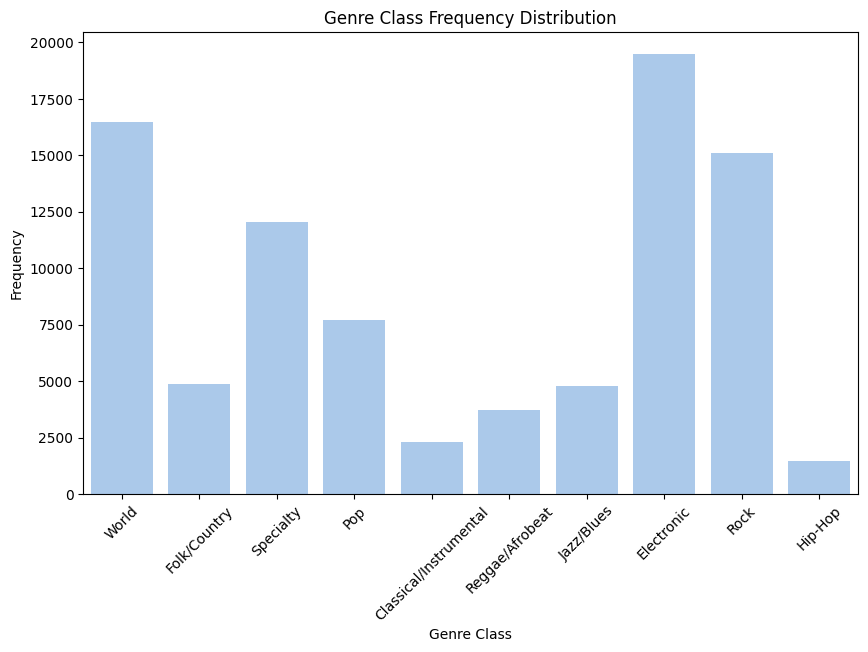

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set pastel palette
sns.set_palette("pastel")
plt.figure(figsize=(10, 6))

# Countplot for track_genre frequencies
sns.countplot(x='genre_group', data=final_df, color=sns.color_palette("pastel")[0])


plt.xlabel('Genre Class')
plt.ylabel('Frequency')
plt.title('Genre Class Frequency Distribution')

plt.xticks(rotation=45)
# Show the plot
plt.show()

#We can see that the groups are imbalanced. We will address this imbalance in the modeling process.



### Descriptive statistics of the Features:

In [69]:
#Descriptive statistics of the Features:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,73559.0,52812.867372,33578.229818,0.000,23010.0000,49801.000000,80061.5000,113999.000
popularity,73559.0,34.382088,19.192774,0.000,21.0000,34.000000,48.0000,100.000
duration_ms,73559.0,232129.344553,119005.588634,8586.000,173933.0000,215880.000000,268600.0000,5237295.000
explicit,73559.0,0.086380,0.280926,0.000,0.0000,0.000000,0.0000,1.000
danceability,73559.0,0.558642,0.178518,0.000,0.4450,0.573000,0.6900,0.985
energy,73559.0,0.636956,0.258683,0.000,0.4570,0.680000,0.8590,1.000
key,73559.0,5.283704,3.556507,0.000,2.0000,5.000000,8.0000,11.000
loudness,73559.0,-8.603882,5.319223,-49.531,-10.4675,-7.266000,-5.1410,4.532
mode,73559.0,0.633763,0.481778,0.000,0.0000,1.000000,1.0000,1.000
speechiness,73559.0,0.090329,0.119277,0.000,0.0362,0.049400,0.0884,0.965


In [70]:
#Summery table for all vars

pd.set_option('display.precision', 2) #show only 2 digit after zero
final_df.describe()

,Unnamed: 0,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo,genre_class
count,87967.00,8.80e+04,87967.00,87967.00,87967.00,87967.00,87967.00,87967.00,8.80e+04,87967.00,87967.00
mean,54494.17,2.29e+05,0.09,0.57,0.64,-8.32,0.09,0.32,1.63e-01,122.13,3.55
std,33340.50,1.12e+05,0.28,0.18,0.25,5.11,0.11,0.33,3.16e-01,30.14,2.97
min,0.00,8.59e+03,0.00,0.00,0.00,-49.53,0.00,0.00,0.00e+00,0.00,0.00
25%,24741.50,1.74e+05,0.00,0.45,0.47,-10.07,0.04,0.02,0.00e+00,99.04,1.00
50%,52602.00,2.14e+05,0.00,0.58,0.69,-7.02,0.05,0.17,4.48e-05,122.02,4.00
75%,82680.50,2.64e+05,0.00,0.70,0.86,-5.02,0.09,0.60,6.21e-02,140.09,6.00
max,113999.00,5.24e+06,1.00,0.98,1.00,4.53,0.96,1.00,1.00e+00,243.37,9.00


In [71]:
final_df['genre_class'].unique()

array([4, 7, 8, 1, 5, 9, 6, 0, 2, 3])

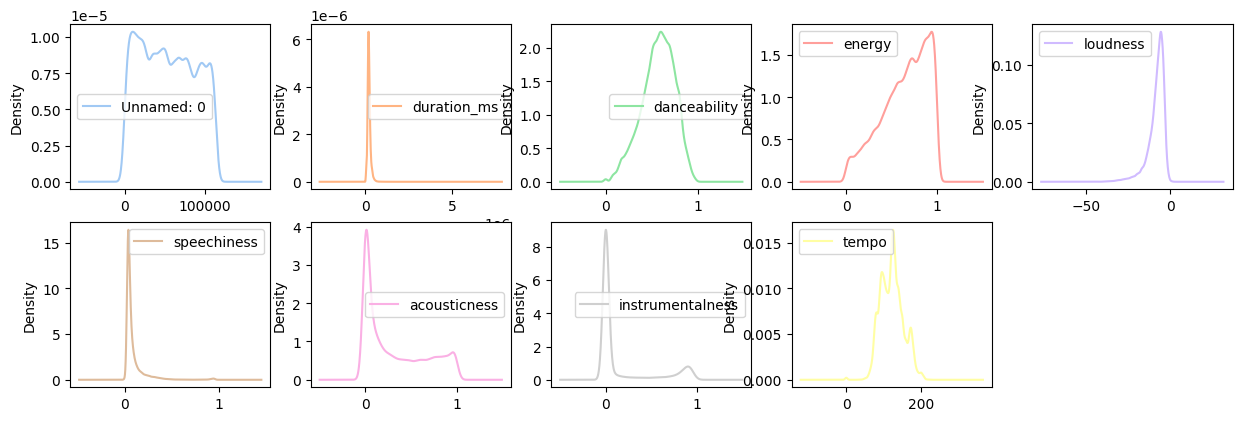

In [72]:
# Visualising the density plots  only for quantitiative  features:
final_df.drop(columns=['explicit','genre_class']).plot(kind="density", layout=(6, 5),
                                         subplots=True, sharex=False, sharey=False, figsize=(15, 15))
plt.show()



In [73]:
# Here we investigate the skeewness
quantitative_df = final_df.select_dtypes(include='number').drop(columns=['explicit', 'genre_class'])

# Calculate skewness for each quantitative feature
skewness_values = quantitative_df.skew()

# Display skewness values
print(skewness_values)


#A skewness close to 0 suggests a symmetrical distribution.
#A positive skewness indicates a right-skewed distribution (tail on the right).
#A negative skewness indicates a left-skewed distribution (tail on the left).


Unnamed: 0           0.10
duration_ms         11.43
danceability        -0.42
energy              -0.61
loudness            -2.02
speechiness          4.54
acousticness         0.71
instrumentalness     1.66
tempo                0.21
dtype: float64


Next we investigated The features distributions'.
Based on the descriptive statistic table, the figures above, and the skweness calculation:
We found a right-skewed distribution for the folowing variables:
duration_ms, speechiness, acousticness
and instrumentalnes, and a left-skewed distribution for loudness(for example, 75% (q3) of the cases are below -0.5, whereas the max value of loudness is 4.5).

We will deal with feature engeneering for the skwenss later on.


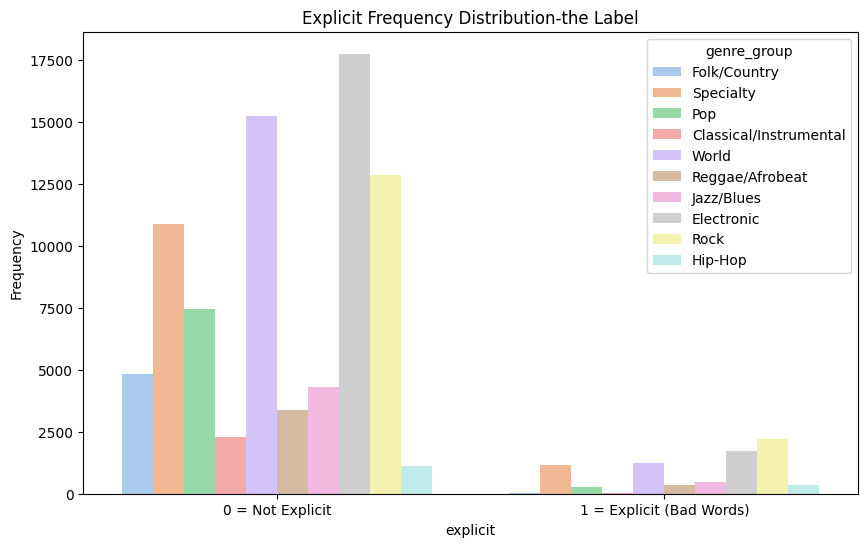

In [74]:
# Graph for explicit_cat by track_genre
plt.figure(figsize=(10, 6))

# Countplot for track_genre frequencies
sns.countplot(x='explicit', hue='genre_group', data=final_df, palette="pastel")


plt.xlabel('explicit')
plt.ylabel('Frequency')
plt.title('Explicit Frequency Distribution-the Label')

plt.xticks([0, 1], ['0 = Not Explicit', '1 = Explicit (Bad Words)'])

plt.show()

# Bar Chart for the Categorical Feature: 'Explicit' (Presence of Explicit Language).
#As expected, Hip Hop and Death Metal show the highest frequencies of explicit content, while Classical music has none.


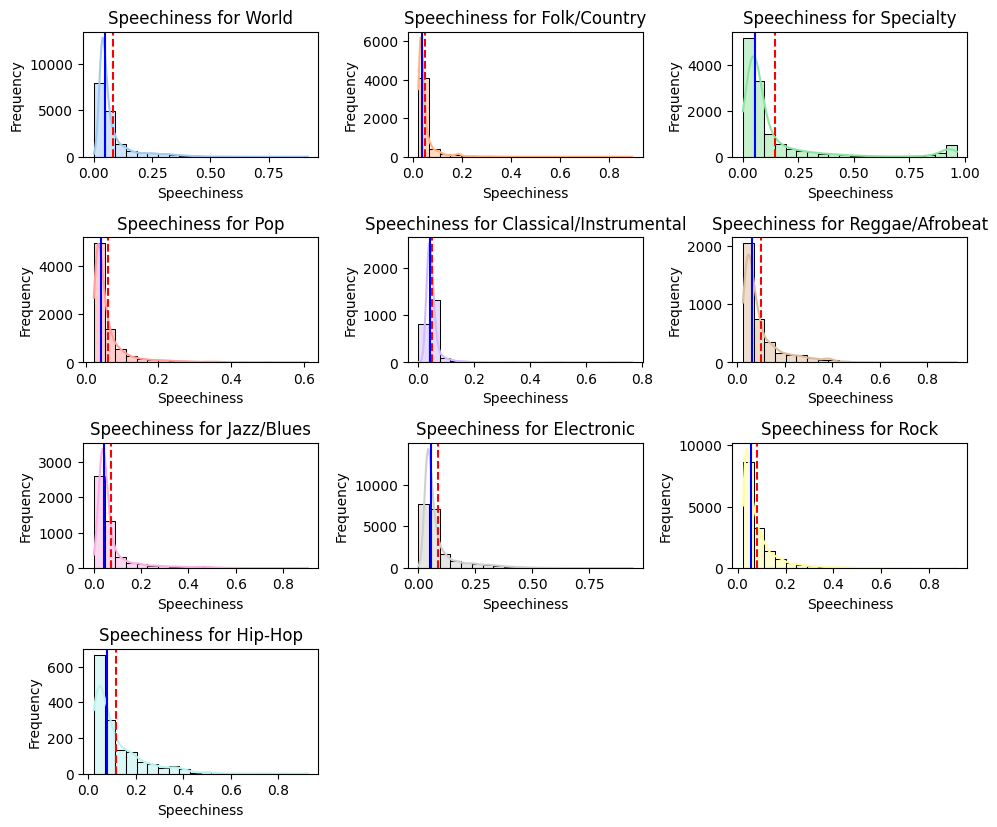

In [75]:
#what is the distribution of speechiness by track_genre?
#what is the mean and median values? WE RUN THESE FOR ALL VARIABLE-BUT IT IS NOT SHOWN IN THIS NOTEBOOK


# Get unique genres
genres = final_df['genre_group'].unique()

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(5, 3, figsize=(10, 10))  # 2 rows, 3 columns

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through each genre and plot the distribution of speechiness for that genre
for i, genre in enumerate(genres):
    df_genre = final_df[final_df['genre_group'] == genre]

    # Plot the histogram for speechiness
    sns.histplot(df_genre['speechiness'], kde=True, color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))], ax=axes[i], bins=20)

    # Calculate the mean and median
    mean_speechiness = df_genre['speechiness'].mean()
    median_speechiness = df_genre['speechiness'].median()

    # Plot mean and median as vertical lines
    axes[i].axvline(mean_speechiness, color='red', linestyle='--', label=f'Mean: {mean_speechiness:.2f}')
    axes[i].axvline(median_speechiness, color='blue', linestyle='-', label=f'Median: {median_speechiness:.2f}')

    # Set labels and title
    axes[i].set_xlabel('Speechiness')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Speechiness for {genre}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

### **Feature engineering and Scaling**

In [76]:

#We first use log trnasformation for featuears that are heavily right-skewed, with most values near zero and a long right tail:
#  (duration_ms, speechiness, acousticness, instrumentalness).


final_df['duration_ms_log'] = np.log1p(final_df['duration_ms'])
final_df['speechiness_log'] = np.log1p(final_df['speechiness'])
final_df['acousticness_log'] = np.log1p(final_df['acousticness'])
final_df['instrumentalness_log'] = np.log1p(final_df['instrumentalness'])


print(final_df[['duration_ms', 'duration_ms_log']])


       duration_ms  duration_ms_log
0         178533.0            12.09
1         151680.0            11.93
2          84305.0            11.34
3          86675.0            11.37
4         289133.0            12.57
...            ...              ...
87962     207554.0            12.24
87963     191153.0            12.16
87964     207554.0            12.24
87965     256226.0            12.45
87966     212346.0            12.27

[87967 rows x 2 columns]


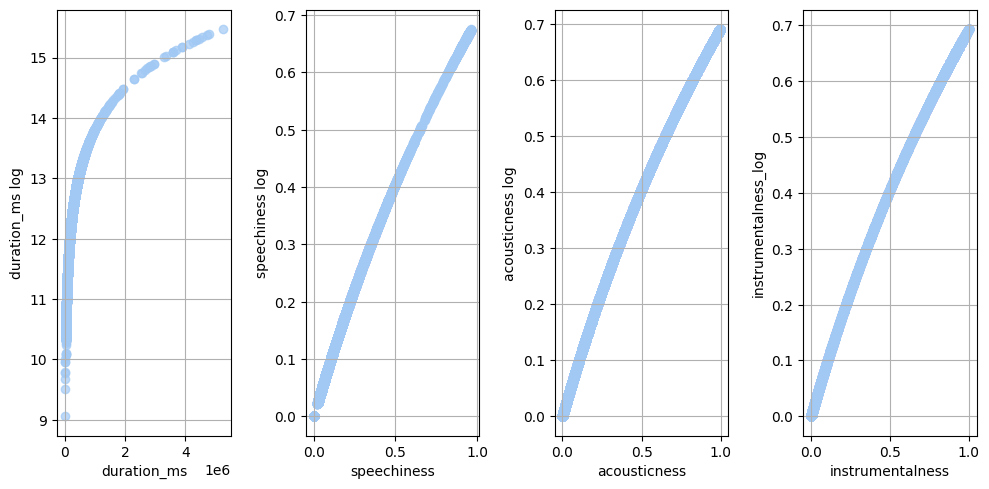

In [77]:
plt.figure(figsize=(10, 5))

# Plotting 'tempo' vs 'tempo^2' in the first subplot
plt.subplot(1, 4, 1)
plt.scatter(final_df['duration_ms'], final_df['duration_ms_log'], alpha=0.7)
plt.xlabel('duration_ms')
plt.ylabel('duration_ms log')
plt.grid(True)

# Plotting 'danceability' vs 'danceability^2' in the second subplot
plt.subplot(1, 4, 2)
plt.scatter(final_df['speechiness'], final_df['speechiness_log'], alpha=0.7)
plt.xlabel('speechiness')
plt.ylabel('speechiness log')
plt.grid(True)


plt.subplot(1, 4, 3)
plt.scatter(final_df['acousticness'], final_df['acousticness_log'], alpha=0.7)
plt.xlabel('acousticness')
plt.ylabel('acousticness log')
plt.grid(True)


plt.subplot(1, 4, 4)
plt.scatter(final_df['instrumentalness'], final_df['instrumentalness_log'], alpha=0.7)
plt.xlabel('instrumentalness')
plt.ylabel('instrumentalness_log')
plt.grid(True)



# Show the combined plot
plt.tight_layout()
plt.show()

In [78]:
#Generating polynomial feature for tempo and denceability becuase they are not linear:
from sklearn.preprocessing import PolynomialFeatures


# Initialize the PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Fit and transform the 'tempo' feature
poly_features = poly.fit_transform(final_df[['tempo']])

# Get the feature names for the new polynomial features
poly_feature_names = poly.get_feature_names_out(['tempo'])

# Add the polynomial features directly to the original DataFrame
final_df[poly_feature_names] = poly_features



poly2 = PolynomialFeatures(degree=2, interaction_only=False)

# Fit and transform the 'danceability' feature
poly_features2 = poly2.fit_transform(final_df[['danceability']])

# Get the feature names for the new polynomial features
poly_feature_names2 = poly2.get_feature_names_out(['danceability'])

# Add the polynomial features directly to the original DataFrame
final_df[poly_feature_names2] = poly_features2


print(final_df.head())




   Unnamed: 0                track_id  duration_ms  explicit  danceability  \
0     36750.0  0fROT4kK5oTm8xO8PX6EJF     178533.0       1.0          0.82   
1     92751.0  1hH0t381PIXmUVWyG1Vj3p     151680.0       0.0          0.61   
2     66970.0  1B45DvGMoFWdbAEUH2qliG      84305.0       0.0          0.55   
3     66996.0  73lXf5if6MWVWnsgXhK8bd      86675.0       0.0          0.66   
4    101161.0  0jmz4aHEIBCRgrcV2xEkwB     289133.0       0.0          0.11   

   energy  loudness  speechiness  acousticness  instrumentalness  ...  \
0    0.61     -7.77         0.25          0.17          0.00e+00  ...   
1    0.38    -10.36         0.03          0.48          0.00e+00  ...   
2    0.81     -5.54         0.06          0.13          9.92e-06  ...   
3    0.61     -8.69         0.09          0.12          0.00e+00  ...   
4    0.06    -28.05         0.06          0.99          6.97e-01  ...   

   track_genre   genre_group genre_class  duration_ms_log  speechiness_log  \
0       french

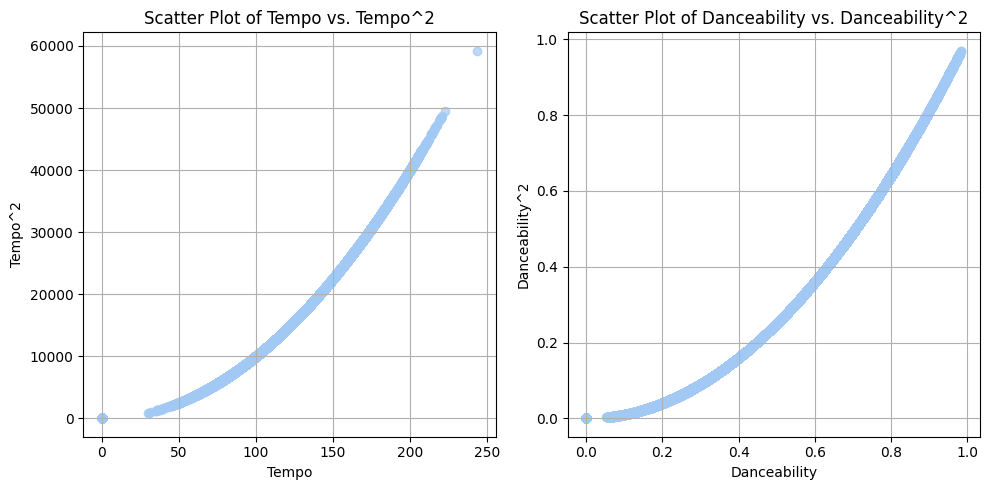

In [79]:
# Combined plot of both polynomial transformations in a single figure

plt.figure(figsize=(10, 5))

# Plotting 'tempo' vs 'tempo^2' in the first subplot
plt.subplot(1, 2, 1)
plt.scatter(final_df['tempo'], final_df['tempo^2'], alpha=0.7)
plt.title('Scatter Plot of Tempo vs. Tempo^2')
plt.xlabel('Tempo')
plt.ylabel('Tempo^2')
plt.grid(True)

# Plotting 'danceability' vs 'danceability^2' in the second subplot
plt.subplot(1, 2, 2)
plt.scatter(final_df['danceability'], final_df['danceability^2'], alpha=0.7)
plt.title('Scatter Plot of Danceability vs. Danceability^2')
plt.xlabel('Danceability')
plt.ylabel('Danceability^2')
plt.grid(True)

# Show the combined plot
plt.tight_layout()
plt.show()


In [80]:
# Creating interaction variables directly in final_df
# Interaction between 'duration_ms' and 'energy'
final_df['duration_ms_energy_interaction'] = final_df['duration_ms'] * final_df['energy']

# Interaction between 'tempo' and 'danceability'
final_df['tempo_danceability_interaction'] = final_df['tempo'] * final_df['danceability']

# Display the first few rows to verify the new interaction columns
print(final_df[['duration_ms', 'energy', 'duration_ms_energy_interaction', 'tempo', 'danceability', 'tempo_danceability_interaction']].head())


   duration_ms  energy  duration_ms_energy_interaction   tempo  danceability  \
0     178533.0    0.61                       109262.20  142.96          0.82   
1     151680.0    0.38                        56880.00  110.72          0.61   
2      84305.0    0.81                        68455.66  118.37          0.55   
3      86675.0    0.61                        52958.42  118.44          0.66   
4     289133.0    0.06                        16422.75  169.40          0.11   

   tempo_danceability_interaction  
0                          117.66  
1                           68.09  
2                           65.46  
3                           78.65  
4                           18.80  


Feature Engeneering

## 2.5. **Correlation Analysis**

In [81]:
#What is the correlation between all quantitative features in the dataset? Using Pearson correlation coefficients.
#we use Pearson correlation coefficients:
columns = ['speechiness','danceability', 'loudness', 'tempo','acousticness','energy','instrumentalness','duration_ms']

correlation_matrix = final_df[columns].corr()

print(correlation_matrix)

#Danceability and loudness have a relatively strong correlation, while loudness and speechiness show a medium correlation.
#Surprisingly, tempo and danceability have a very low correlation, which can be explained by the fact that classical tracks tend to have a high tempo and low danceability.


                  speechiness  danceability  loudness     tempo  acousticness  \
speechiness          1.00e+00          0.11  5.30e-02  3.27e-03          0.01   
danceability         1.07e-01          1.00  2.74e-01 -4.14e-02         -0.17   
loudness             5.30e-02          0.27  1.00e+00  2.19e-01         -0.58   
tempo                3.27e-03         -0.04  2.19e-01  1.00e+00         -0.21   
acousticness         1.48e-02         -0.17 -5.78e-01 -2.12e-01          1.00   
energy               1.37e-01          0.14  7.55e-01  2.49e-01         -0.72   
instrumentalness    -9.73e-02         -0.20 -4.36e-01 -5.19e-02          0.10   
duration_ms         -6.12e-02         -0.07 -1.19e-03  2.61e-02         -0.10   

                  energy  instrumentalness  duration_ms  
speechiness         0.14             -0.10    -6.12e-02  
danceability        0.14             -0.20    -6.64e-02  
loudness            0.76             -0.44    -1.19e-03  
tempo               0.25             -

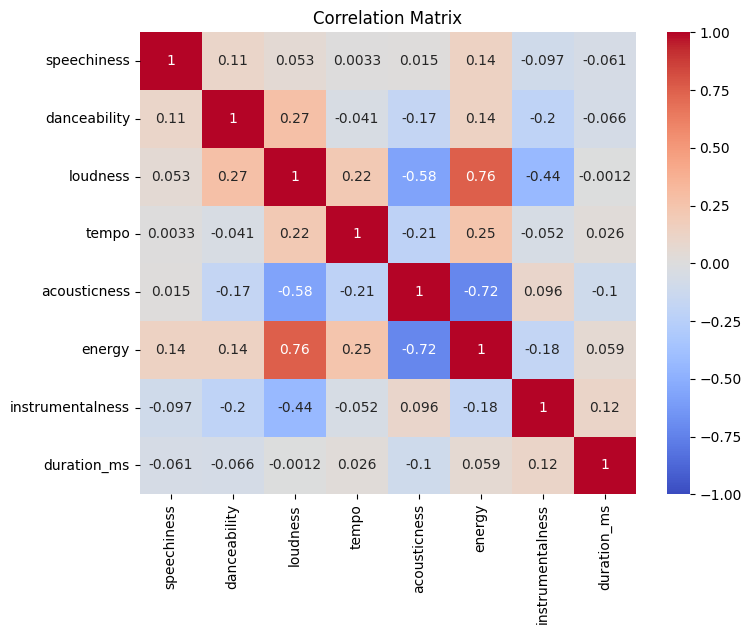

In [82]:
# Correlation plot: we did this beacuse we want to check the relationship between the features in the model and to prevent multicollinearity.
#We want to make sure that the features are not measuring the same attribute.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


#High correlations between: enrgy and loudness
                        #enrgy and acousticness
# so i can drop energy from the model
# OR i CAN APPLY PCA DIMENSIONALITY REDUCTION


#.3. **Feature Selection and Engineering**

In [83]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Binarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif  # Use f_classif as the scoring function
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore")

#Building the piplines:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


# .4. Model Comparison (Random Forest, SVM, Desicion Tree, Logistic Regression) NOTEBOOK A
      - impact of feature engeneering and class balancing (SMOTE/ using balanced portion of the data/ Clustering + SMOTE) on the models - NOTEBOOK A

**Ctrl+click the link bellow, this will direct you to notebook A** for comparison between different models in different given parameters (classes and features).

In [ ]:
from IPython.display import HTML

link = '<a href="https://colab.research.google.com/drive/16sKKPEt2-Q2RtBCwblU8_XSlFQvBXSXt" target="_blank">Open Notebook</a>'
display(HTML(link))


# .5. **Model Building**



##.5.1 **LOGISTIC REGRESSION**

In [84]:

#STARTING WITH LOGISTIC REGRESSION

# Splitting the data
X = final_df.drop(['genre_class', 'track_genre','genre_group'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Define the columns for quantitative features
quantitative_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                        'acousticness', 'instrumentalness', 'tempo']
non_quantitiative=['explicit']

# Define the preprocessing pipeline for quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler()),  # Standardize quantitative columns
    ]), quantitative_columns),

    # Add non-quantitative columns
    ('non_quant', 'passthrough', non_quantitiative)
])

# Define classifiers for voting
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight='balanced')



# Voting Classifier Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',clf1)
])

# Define the parameter grid for the logistic regression part inside Voting Classifier
param_grid = {
    'classifier__C': [0.01, 0.1, 1.0],  # Regularization parameter for Logistic Regression
}


# GridSearchCV with VotingClassifier (tuning the logistic regression component)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)


In [85]:
# Train the Voting Classifier with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")




Test Accuracy: 0.28


In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Confusion Matrix using the correct variables
cm = confusion_matrix(y_true=y_test,  # True labels
                      y_pred=y_pred_test)  # Predicted labels

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(cm,
                     index=best_model.named_steps['classifier'].classes_,  # Class labels from the voting classifier
                     columns=best_model.named_steps['classifier'].classes_)

cm_df



,Classical/Instrumental,Electronic,Folk/Country,Hip-Hop,Jazz/Blues,Pop,Reggae/Afrobeat,Rock,Specialty,World
Classical/Instrumental,421,8,100,13,48,31,12,34,12,17
Electronic,337,1884,267,660,175,244,1251,828,165,33
Folk/Country,78,27,666,59,155,152,94,140,33,53
Hip-Hop,0,4,54,164,35,28,90,28,14,22
Jazz/Blues,56,53,327,191,267,120,153,192,34,37
Pop,47,89,470,162,325,321,350,457,30,67
Reggae/Afrobeat,20,121,56,252,32,85,328,199,17,12
Rock,39,222,399,285,238,297,295,2653,61,41
Specialty,803,285,478,345,309,92,360,363,543,32
World,310,138,1137,710,553,474,629,552,207,235


In [87]:

from sklearn.metrics import confusion_matrix

# Confusion Matrix using the correct variables
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(cm,
                     index=best_model.named_steps['classifier'].classes_,  # Class labels from the classifier
                     columns=best_model.named_steps['classifier'].classes_)

# Calculate the accuracy for each class
class_accuracies = {}
for i, class_label in enumerate(best_model.named_steps['classifier'].classes_):
    # Calculate the accuracy for the current class
    class_accuracy = cm[i, i] / cm[i, :].sum()
    class_accuracies[class_label] = class_accuracy

# Convert to a DataFrame for a nicer presentation and sort it in descending order
class_accuracies_df = pd.DataFrame(list(class_accuracies.items()), columns=['Genre Group', 'Accuracy'])
class_accuracies_df = class_accuracies_df.sort_values(by='Accuracy', ascending=False)

# Print the result
print("Accuracy for Each Genre Group (Descending Order):")
print(class_accuracies_df)


Accuracy for Each Genre Group (Descending Order):
              Genre Group  Accuracy
0  Classical/Instrumental      0.60
7                    Rock      0.59
2            Folk/Country      0.46
3                 Hip-Hop      0.37
1              Electronic      0.32
6         Reggae/Afrobeat      0.29
4              Jazz/Blues      0.19
8               Specialty      0.15
5                     Pop      0.14
9                   World      0.05


In [88]:
# Check class distribution in the target variable
print(y_train.value_counts(normalize=True))


genre_group
Electronic                0.22
World                     0.19
Rock                      0.17
Specialty                 0.14
Pop                       0.09
Folk/Country              0.06
Jazz/Blues                0.05
Reggae/Afrobeat           0.04
Classical/Instrumental    0.03
Hip-Hop                   0.02
Name: proportion, dtype: float64


### **Creating the added Engeneered Features we created: log-transformed, polynomial, and interaction features to improve accuracy results**

In [89]:

#Adding the new variables we created: log-transformed, polynomial, and interaction features:

# Assuming log-transformed, polynomial, and interaction features were already created in final_df

# List of original quantitative features
quantitative_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                        'acousticness', 'instrumentalness']

# Adding log-transformed features to the list
log_transformed_columns = ['duration_ms_log', 'speechiness_log', 'acousticness_log', 'instrumentalness_log']

# Adding polynomial features to the list
polynomial_columns = ['tempo^2', 'danceability^2']

# Adding interaction terms to the list
interaction_columns = ['duration_ms_energy_interaction', 'tempo_danceability_interaction']

# Full list of quantitative features including original, log, polynomial, and interaction terms
all_quantitative_columns = quantitative_columns + log_transformed_columns + polynomial_columns + interaction_columns

# Define the non-quantitative columns
non_quantitative = ['explicit']

# Splitting the data
X = final_df.drop(['genre_class', 'track_genre', 'genre_group'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the preprocessing pipeline for all quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler()),  # Standardize quantitative columns
    ]), all_quantitative_columns),

    # Add non-quantitative columns
    ('non_quant', 'passthrough', non_quantitative)
])

# Define the Logistic Regression classifier
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', clf1)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.01, 0.1, 1.0],  # Regularization parameter for Logistic Regression
}

# Perform GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(cm,
                     index=best_model.named_steps['classifier'].classes_,  # Class labels
                     columns=best_model.named_steps['classifier'].classes_)

# Display the confusion matrix DataFrame
cm_df

#With the transformed variables the model imporve with only 0.2 precentage points.


Test Accuracy: 0.30


,Classical/Instrumental,Electronic,Folk/Country,Hip-Hop,Jazz/Blues,Pop,Reggae/Afrobeat,Rock,Specialty,World
Classical/Instrumental,407,9,104,12,33,27,11,33,34,26
Electronic,330,2006,342,711,117,349,931,849,145,64
Folk/Country,113,24,728,58,120,126,86,116,30,56
Hip-Hop,1,12,75,162,19,27,80,28,18,17
Jazz/Blues,71,49,336,196,231,152,135,164,35,61
Pop,47,96,625,152,198,342,288,429,17,124
Reggae/Afrobeat,12,127,65,257,16,116,311,175,9,34
Rock,44,229,477,299,173,393,181,2617,49,68
Specialty,768,283,386,306,245,114,299,320,801,88
World,301,156,1261,749,411,430,591,476,182,388


**4.2 Voting classifier**

In [90]:

#Ensemble trees: First applying The Voting Classifier:


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



# Splitting the data
X = final_df.drop(['genre_class', 'track_genre','genre_group'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features
quantitative_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                        'acousticness', 'instrumentalness', 'tempo']
non_quantitiative=['explicit']

# Define the preprocessing pipeline for quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler())  # Standardize quantitative columns
    ]), quantitative_columns),

    # Add non-quantitative columns
    ('non_quant', 'passthrough', non_quantitiative)
])

# Define classifiers for voting
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight='balanced')
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5, random_state=422,class_weight='balanced')


voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt1', clf2)
], voting='soft')  # Use 'soft' to allow probability predictions


# Voting Classifier Pipeline
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# Define the parameter grid for the logistic regression part inside Voting Classifier
param_grid = {
    'voting_clf__lr__C': [0.01, 0.1],  # Logistic Regression
    'voting_clf__dt1__max_depth': [10],  # Decision Tree 1
    'voting_clf__dt1__min_samples_split': [4],
}


# GridSearchCV with VotingClassifier (tuning the logistic regression component)
grid_search = GridSearchCV(voting_pipeline, param_grid, cv=5, n_jobs=-1)





In [92]:
# Train the Voting Classifier with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.34


In [93]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix using the correct variables
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(cm,
                     index=best_model.named_steps['voting_clf'].classes_,  # Class labels from the classifier
                     columns=best_model.named_steps['voting_clf'].classes_)

# Calculate the accuracy for each class
class_accuracies = {}
for i, class_label in enumerate(best_model.named_steps['voting_clf'].classes_):
    # Calculate the accuracy for the current class
    class_accuracy = cm[i, i] / cm[i, :].sum()
    class_accuracies[class_label] = class_accuracy

# Convert to a DataFrame for a nicer presentation and sort it in descending order
class_accuracies_df = pd.DataFrame(list(class_accuracies.items()), columns=['Genre Group', 'Accuracy'])
class_accuracies_df = class_accuracies_df.sort_values(by='Accuracy', ascending=False)

# Print the result
print("Accuracy for Each Genre Group (Descending Order):")
print(class_accuracies_df)

Accuracy for Each Genre Group (Descending Order):
              Genre Group  Accuracy
7                    Rock      0.57
0  Classical/Instrumental      0.54
2            Folk/Country      0.47
3                 Hip-Hop      0.44
6         Reggae/Afrobeat      0.36
1              Electronic      0.35
8               Specialty      0.31
5                     Pop      0.24
4              Jazz/Blues      0.23
9                   World      0.12


In [94]:
# Using the ROC curve and AUC to see how the model preforms at different classification thresholds:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# Get the predicted probabilities for the test set
y_prob_train = best_model.predict_proba(X_train)

# Get the predicted probabilities for the test set
y_prob_test = best_model.predict_proba(X_test)



roc_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr')

print(f"Voting Classifier train ROC AUC: {roc_auc:.2f}")


# If multiclass classification, calculate ROC AUC for each class (one-vs-rest approach)
roc_auc = roc_auc_score(y_test, y_prob_test, multi_class='ovr')

print(f"Voting Classifier test ROC AUC: {roc_auc:.2f}")

Voting Classifier train ROC AUC: 0.81
Voting Classifier test ROC AUC: 0.78


**Voting classifier with transformed features the increase accurecy levels:**

In [95]:

# Ensemble trees: Applying The Voting Classifier after feature engeneering

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# List of original quantitative features
quantitative_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                        'acousticness', 'instrumentalness']

# Adding log-transformed features to the list
log_transformed_columns = ['duration_ms_log', 'speechiness_log', 'acousticness_log', 'instrumentalness_log']

# Adding polynomial features to the list
polynomial_columns = ['tempo^2', 'danceability^2']

# Adding interaction terms to the list
interaction_columns = ['duration_ms_energy_interaction', 'tempo_danceability_interaction']

# Full list of quantitative features including original, log, polynomial, and interaction terms
all_quantitative_columns = quantitative_columns + log_transformed_columns + polynomial_columns + interaction_columns

# Define the non-quantitative columns
non_quantitative = ['explicit']

# Splitting the data
X = final_df.drop(['genre_class', 'track_genre', 'genre_group'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the preprocessing pipeline for all quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler())  # Standardize quantitative columns
    ]), all_quantitative_columns),

    # Pass through non-quantitative columns
    ('non_quant', 'passthrough', non_quantitative)
])

# Define classifiers for voting
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5,
                              random_state=422, class_weight='balanced')

voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt1', clf2)
], voting='soft')  # Use 'soft' to allow probability predictions

# Voting Classifier Pipeline
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# Define the parameter grid for the logistic regression part inside Voting Classifier
param_grid = {
    'voting_clf__lr__C': [0.01, 0.1],  # Logistic Regression
    'voting_clf__dt1__max_depth': [10],  # Decision Tree max depth
    'voting_clf__dt1__min_samples_split': [4]  # Decision Tree min samples split
}

# GridSearchCV with VotingClassifier (tuning the logistic regression component)
grid_search = GridSearchCV(voting_pipeline, param_grid, cv=5, n_jobs=-1)


In [96]:
# Train the Voting Classifier with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")

#Same reslts when using features that were engineered

Test Accuracy: 0.34


##5.2 **Ensemble 1 : RandomForest with voting classifier and Logistic regression**

In [97]:
# RandomForest with voting classifier and Logistic regression:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score



# Splitting the data
X = final_df.drop(['genre_class', 'track_genre', 'genre_group', 'track_id'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features
quantitative_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                        'acousticness', 'instrumentalness', 'tempo']

# Define the non-quantitative columns
non_quantitative = ['explicit']  # numeric feature (0, 1)

# Define the preprocessing pipeline for quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler())  # Standardize quantitative columns
    ]), quantitative_columns),

    # Pass non-quantitative columns through without transformation
    ('non_quant', 'passthrough', non_quantitative)
])

# Define classifiers for VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5,
                              random_state=422, class_weight='balanced')
clf3 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=422, class_weight='balanced')

# Define VotingClassifier
randomforest_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt1', clf2),
    ('rf', clf3)
], voting='soft')

# Voting Classifier Pipeline
randomf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforest_clf', randomforest_clf)
])

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'randomforest_clf__rf__n_estimators': [100],
    'randomforest_clf__rf__max_depth': [10],
    'randomforest_clf__rf__min_samples_split': [2],
    'randomforest_clf__rf__min_samples_leaf': [1],
    'randomforest_clf__rf__criterion': ['gini'],
    'randomforest_clf__rf__bootstrap': [True]
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(randomf_pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the training set
y_pred_train = best_model.predict(X_train)

# Predict on the test set
y_pred_test = best_model.predict(X_test)





## 5.3 **Model evaluation**


### **5.3.1 Feature importance**

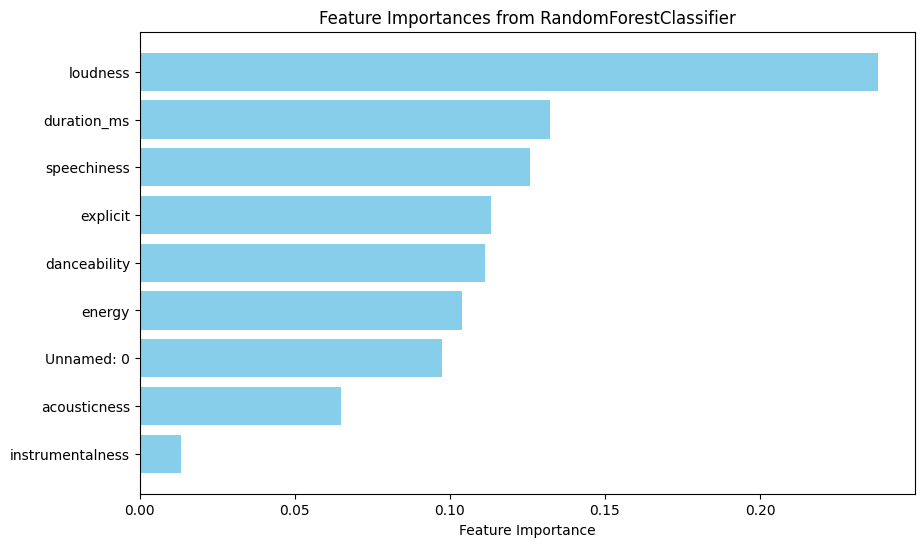

In [98]:

# Extract and display feature importances
feature_importances = best_model.named_steps['randomforest_clf'].estimators_[2].feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame with feature names

# Create a sorted list of features and their importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from RandomForestClassifier')
plt.gca().invert_yaxis()  # Invert y-axis for a better visualization
plt.show()
#if i am dropint tempo the model accuracy score is lower






**4.2 Different evaluation matrices**

In [99]:
# Confusion Matrix using the correct variables
cm = confusion_matrix(y_true=y_test,  # True labels
                      y_pred=y_pred_test)  # Predicted labels

# Convert the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(cm,
                     index=best_model.named_steps['randomforest_clf'].classes_,  # Class labels from the voting classifier
                     columns=best_model.named_steps['randomforest_clf'].classes_)

# Display the confusion matrix DataFrame
print(cm_df)

# Accuracy score using the correct variables
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

                        Classical/Instrumental  Electronic  Folk/Country  \
Classical/Instrumental                     393          14            88   
Electronic                                 259        2126           342   
Folk/Country                                45          22           723   
Hip-Hop                                      1           7            66   
Jazz/Blues                                  42          54           225   
Pop                                         37          95           397   
Reggae/Afrobeat                             14         119            77   
Rock                                        37         238           419   
Specialty                                  455         227           328   
World                                      196         156           893   

                        Hip-Hop  Jazz/Blues  Pop  Reggae/Afrobeat  Rock  \
Classical/Instrumental       12          38   42                8    21   
Electronic   

In [100]:
from sklearn.metrics import f1_score
#evaluating the weighted F1 score on both the training and test sets:
#F score is a harmonic mean of precision and recall,

# Evaluate the F1 score on training and test sets
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

# Output F1 scores
print(f"Train F1 Score: {train_f1:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")

# Output accuracy scores using the best_model from GridSearchCV
print(f"RandomForest Classifier Train accuracy: {best_model.score(X_train, y_train):.2f}")
print(f"RandomForest Classifier Test accuracy: {best_model.score(X_test, y_test):.2f}")


Train F1 Score: 0.40
Test F1 Score: 0.38
RandomForest Classifier Train accuracy: 0.39
RandomForest Classifier Test accuracy: 0.36


**4.3 ROC AUC**

In [101]:
# Get the predicted probabilities for the test set
y_prob_train = best_model.predict_proba(X_train)

# Get the predicted probabilities for the test set
y_prob_test = best_model.predict_proba(X_test)



roc_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr')

print(f"Random Forest Classifier train ROC AUC: {roc_auc:.2f}")


# If multiclass classification, calculate ROC AUC for each class (one-vs-rest approach)
roc_auc = roc_auc_score(y_test, y_prob_test, multi_class='ovr')

print(f"Random Forest Classifier test ROC AUC: {roc_auc:.2f}")

Random Forest Classifier train ROC AUC: 0.83
Random Forest Classifier test ROC AUC: 0.80


# .6. Ensemble 2 : RandomForest with voting classifier and Logistic regression with engeneered features

In [102]:
#With TRANSFORMED VARIABLES:
# Splitting the data
X = final_df.drop(['genre_class', 'track_genre', 'genre_group', 'track_id'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features, including log-transformed, polynomial, and interaction features
quantitative_columns = [
    'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'tempo',
    'duration_ms_log', 'speechiness_log', 'acousticness_log', 'instrumentalness_log',
    'tempo^2', 'danceability^2',
    'duration_ms_energy_interaction', 'tempo_danceability_interaction'
]

# Define the non-quantitative columns
non_quantitative = ['explicit']  # numeric feature (0, 1)

# Define the preprocessing pipeline for quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler())  # Standardize quantitative columns
    ]), quantitative_columns),

    # Add non-quantitative columns separately
    ('non_quant', 'passthrough', non_quantitative)  # numeric feature (0, 1)
])


# Define classifiers for VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5,
                              random_state=422, class_weight='balanced')
clf3 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=422, class_weight='balanced')

# Define VotingClassifier
randomforest_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt1', clf2),
    ('rf', clf3)
], voting='soft')

# Voting Classifier Pipeline
randomf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforest_clf', randomforest_clf)
])

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'randomforest_clf__rf__n_estimators': [100],
    'randomforest_clf__rf__max_depth': [10],
    'randomforest_clf__rf__min_samples_split': [2],
    'randomforest_clf__rf__min_samples_leaf': [1],
    'randomforest_clf__rf__criterion': ['gini'],
    'randomforest_clf__rf__bootstrap': [True]
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(randomf_pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the training set
y_pred_train = best_model.predict(X_train)

# Predict on the test set
y_pred_test = best_model.predict(X_test)



In [103]:
# Evaluate the model performance
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate the confusion matrix for test predictions
cm = confusion_matrix(y_test, y_pred_test)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
cm_df


Train Accuracy: 0.39
Test Accuracy: 0.37


,Classical/Instrumental,Electronic,Folk/Country,Hip-Hop,Jazz/Blues,Pop,Reggae/Afrobeat,Rock,Specialty,World
Classical/Instrumental,387,13,87,11,26,53,8,19,77,26
Electronic,239,2206,361,711,99,336,776,666,242,116
Folk/Country,65,29,723,71,84,159,83,87,41,79
Hip-Hop,2,7,66,168,8,30,81,10,8,19
Jazz/Blues,46,61,252,184,305,192,112,172,43,76
Pop,46,118,409,147,131,663,279,366,39,199
Reggae/Afrobeat,11,119,76,133,21,89,449,149,21,48
Rock,47,220,430,272,119,392,241,2686,49,99
Specialty,430,231,321,312,193,188,249,259,1386,147
World,182,141,905,616,320,703,675,389,268,686


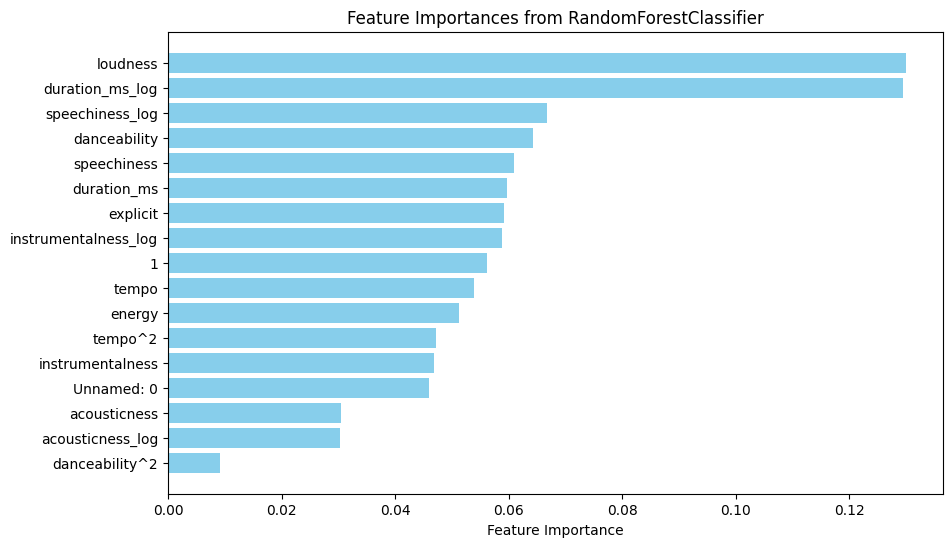

In [104]:

# Extract and display feature importances
feature_importances = best_model.named_steps['randomforest_clf'].estimators_[2].feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame with feature names

# Create a sorted list of features and their importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from RandomForestClassifier')
plt.gca().invert_yaxis()  # Invert y-axis for a better visualization
plt.show()
#if i am dropping tempo the model accuracy score is lower


Based on the feature importnace some features can be removed from the model:
duration_ms_energy_interaction, instrumentalness_log, instrumentalness, energy, loudness, duration_ms_log, tempo,denceability, duration_ms.
Now wil will run a random forest without them and we got lower level of accuracy (0.34. see below) so it is bbetter to keep all featuers.

In [105]:



# Splitting the data
X = final_df.drop(['genre_class', 'track_genre','genre_group', 'track_id'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features, excluding unimportant features
quantitative_columns = [
    'danceability^2', 'speechiness', 'speechiness_log', 'acousticness',
    'acousticness_log', 'tempo^2', 'tempo_danceability_interaction'
]

# Define the non-quantitative columns
non_quantitative = ['explicit']  # numeric feature (0, 1)

# Define the preprocessing pipeline for quantitative columns
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler())  # Standardize quantitative columns
    ]), quantitative_columns),

    # Add non-quantitative columns separately
    ('non_quant', 'passthrough', non_quantitative)  # numeric feature (0, 1)
])

# Define classifiers for VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5,
                              random_state=422, class_weight='balanced')
clf3 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=422, class_weight='balanced')

# Define VotingClassifier
randomforest_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt1', clf2),
    ('rf', clf3)
], voting='soft')

# Voting Classifier Pipeline
randomf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforest_clf', randomforest_clf)
])

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'randomforest_clf__rf__n_estimators': [100],
    'randomforest_clf__rf__max_depth': [10],
    'randomforest_clf__rf__min_samples_split': [2],
    'randomforest_clf__rf__min_samples_leaf': [1],
    'randomforest_clf__rf__criterion': ['gini'],
    'randomforest_clf__rf__bootstrap': [True]
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(randomf_pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the training set
y_pred_train = best_model.predict(X_train)

# Predict on the test set
y_pred_test = best_model.predict(X_test)



In [106]:
# Evaluate the model performance

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate the confusion matrix for test predictions
cm = confusion_matrix(y_test, y_pred_test)
cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
cm_df


Train Accuracy: 0.33
Test Accuracy: 0.31


,Classical/Instrumental,Electronic,Folk/Country,Hip-Hop,Jazz/Blues,Pop,Reggae/Afrobeat,Rock,Specialty,World
Classical/Instrumental,411,12,131,11,11,15,11,26,63,16
Electronic,222,2097,447,718,88,269,767,891,148,105
Folk/Country,158,51,740,76,43,107,77,90,34,45
Hip-Hop,6,27,72,177,6,11,70,12,3,15
Jazz/Blues,132,98,355,168,223,73,101,191,42,60
Pop,120,317,758,158,62,223,258,407,27,67
Reggae/Afrobeat,13,160,107,177,10,68,394,145,11,31
Rock,70,359,485,268,89,188,201,2765,55,75
Specialty,775,327,374,426,81,113,292,318,867,143
World,462,318,1359,685,129,244,653,427,286,322


In [107]:
# Get the predicted probabilities for the test set
y_prob_train = best_model.predict_proba(X_train)

# Get the predicted probabilities for the test set
y_prob_test = best_model.predict_proba(X_test)



roc_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr')

print(f"Random Forest Classifier train ROC AUC: {roc_auc:.2f}")


# If multiclass classification, calculate ROC AUC for each class (one-vs-rest approach)
roc_auc = roc_auc_score(y_test, y_prob_test, multi_class='ovr')

print(f"Random Forest Classifier test ROC AUC: {roc_auc:.2f}")

Random Forest Classifier train ROC AUC: 0.80
Random Forest Classifier test ROC AUC: 0.77


Runing XGBOOST to increase the model level of accurecy

In [108]:
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pandas as pd

# Prepare feature (X) and target (y) variables
X = final_df.drop(['genre_class', 'track_genre', 'genre_group', 'track_id'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features, including log-transformed, polynomial, and interaction features
quantitative_columns = [
    'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'tempo',
    'duration_ms_log', 'speechiness_log', 'acousticness_log', 'instrumentalness_log',
    'tempo^2', 'danceability^2',
    'duration_ms_energy_interaction', 'tempo_danceability_interaction'
]

# Define the non-quantitative columns
non_quantitative = ['explicit']  # numeric feature (0, 1)

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler())
    ]), quantitative_columns),
    ('non_quant', 'passthrough', non_quantitative)
])

# Convert y to numeric using LabelEncoder for XGBoost compatibility
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)

# XGBoost Pipeline (requires numeric y)
xgboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=1))
])

# Define the parameter grid for XGBoost
param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [3],
    'classifier__learning_rate': [0.1],
    'classifier__subsample': [0.8]
}

# GridSearchCV for XGBoost
grid_search = GridSearchCV(xgboost_pipeline, param_grid, cv=5, n_jobs=-1, error_score='raise', verbose=3)

# Fit XGBoost with numeric y
grid_search.fit(X_train, y_train_numeric)
best_xgboost_model = grid_search.best_estimator_

# Predict and evaluate XGBoost on the test set
y_pred_test = best_xgboost_model.predict(X_test)
xgb_test_accuracy = accuracy_score(y_test_numeric, y_pred_test)
print(f"XGBoost Test Accuracy: {xgb_test_accuracy:.2f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
XGBoost Test Accuracy: 0.46


Creating bar chart for the Accuracy results:

**Here we try to run all models together to imprive the accuracy level again**

In [109]:
#######ORIGINAL-TAKES MORE THAN 100 MINUTES TO PROCESS so we stopped####################


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



################

##try all models together


X = final_df.drop(['genre_class', 'track_genre', 'genre_group', 'track_id'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features, including log-transformed, polynomial, and interaction features
quantitative_columns = [
    'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'tempo',
    'duration_ms_log', 'speechiness_log', 'acousticness_log', 'instrumentalness_log',
    'tempo^2', 'danceability^2',
    'duration_ms_energy_interaction', 'tempo_danceability_interaction'
]

# Define the non-quantitative columns
non_quantitative = ['explicit']  # numeric feature (0, 1)
# Define classifiers for voting

clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5, random_state=422,class_weight='balanced')
clf3 = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
clf4 = SVC(probability=True, class_weight='balanced')  # Important to set probability=True for soft voting
clf_xgb = XGBClassifier() #This is an optimized version of gradient boosting-its a boosting techniqe to reduce the residual eroor od the training data

voting_clf = VotingClassifier(estimators=[

    ('dt1', clf2),
    ('rf', clf3),
    ('svc', clf4),
    ('xgb',clf_xgb)
], voting='soft')

# Voting Classifier Pipeline
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# Define the parameter grid for the logistic regression part inside Voting Classifier
param_grid = {
    'voting_clf__dt1__max_depth': [10],  # Decision Tree 1
    'voting_clf__dt1__min_samples_split': [4],
}


# GridSearchCV with VotingClassifier (tuning the logistic regression component)
grid_search = GridSearchCV(voting_pipeline, param_grid, cv=5, n_jobs=-1)





# .7. Ensemble 3: Voting with Random Forest & XGBoost & Desicion Tree classifiers

In [110]:
#now all together: VOTING+RANDOM FOREST+XGBOOST:
# Prepare feature (X) and target (y) variables
X = final_df.drop(['genre_class', 'track_genre', 'genre_group', 'track_id'], axis=1)
y = final_df['genre_group']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the columns for quantitative features, including log-transformed, polynomial, and interaction features
quantitative_columns = [
    'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'tempo',
    'duration_ms_log', 'speechiness_log', 'acousticness_log', 'instrumentalness_log',
    'tempo^2', 'danceability^2',
    'duration_ms_energy_interaction', 'tempo_danceability_interaction'
]

# Define the non-quantitative columns
non_quantitative = ['explicit']  # numeric feature (0, 1)

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('quant_scaling', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('selector', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', StandardScaler())
    ]), quantitative_columns),
    ('non_quant', 'passthrough', non_quantitative)
])

# Define classifiers for VotingClassifier without SVC
clf2 = DecisionTreeClassifier(max_depth=10, criterion='gini', min_samples_split=4, min_samples_leaf=5,
                              random_state=422, class_weight='balanced')
clf3 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf_xgb = XGBClassifier()  # XGBoost classifier

# Define VotingClassifier with selected classifiers
voting_clf = VotingClassifier(estimators=[
    ('dt1', clf2),
    ('rf', clf3),
    ('xgb', clf_xgb)
], voting='soft')

# Voting Classifier Pipeline
voting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# Define the parameter grid for DecisionTree inside Voting Classifier
param_grid = {
    'voting_clf__dt1__max_depth': [10],  # Decision Tree max depth
    'voting_clf__dt1__min_samples_split': [4]
}

# GridSearchCV with VotingClassifier
grid_search = GridSearchCV(voting_pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_model.predict(X_test)

# Print the best model and the test set accuracy
print(f"Best Model: {best_model}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")


Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('quant_scaling',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('selector',
                                                                   SelectKBest(k='all')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration_ms',
                                                   'danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness', 'tempo',
                       

In [111]:
# Get the predicted probabilities for the test set
y_prob_train = best_model.predict_proba(X_train)

# Get the predicted probabilities for the test set
y_prob_test = best_model.predict_proba(X_test)



roc_auc = roc_auc_score(y_train, y_prob_train, multi_class='ovr')

print(f"Random Forest Classifier train ROC AUC: {roc_auc:.2f}")


# If multiclass classification, calculate ROC AUC for each class (one-vs-rest approach)
roc_auc = roc_auc_score(y_test, y_prob_test, multi_class='ovr')

print(f"Random Forest Classifier test ROC AUC: {roc_auc:.2f}")

Random Forest Classifier train ROC AUC: 0.99
Random Forest Classifier test ROC AUC: 0.85


# .8. Summerising acurecy level for all models: original featuears vs. featureas that were engineered

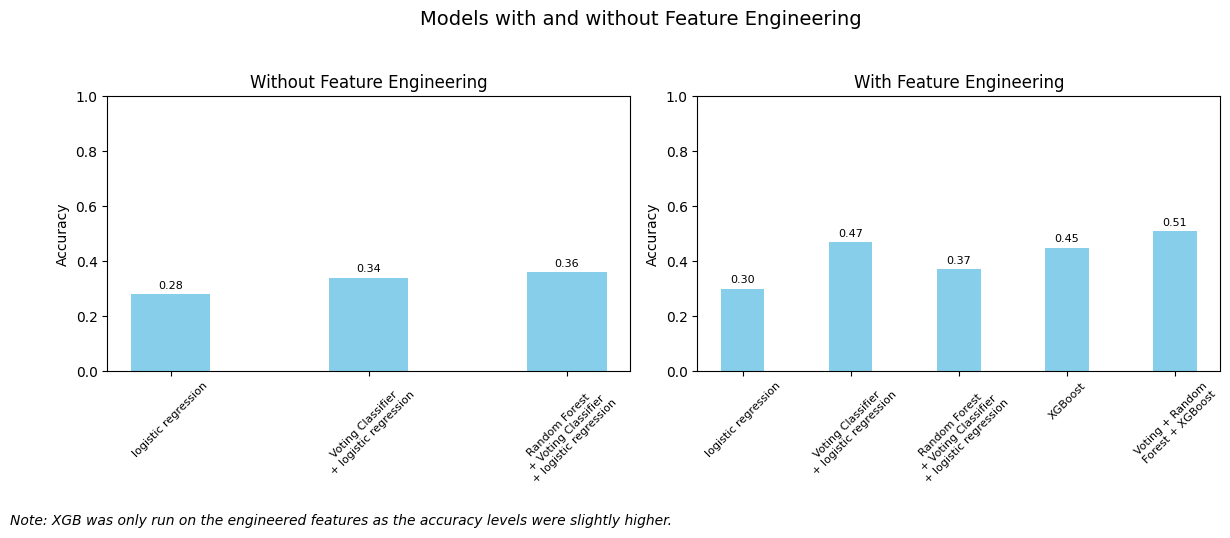

In [112]:

#I inserted the values of the chart by hand:

# Sample accuracy values for each model (without transformed features)
accuracy_scores_1 = {
    "logistic regression": 0.28,
    "Voting Classifier\n+ logistic regression": 0.34,
    "Random Forest\n+ Voting Classifier\n+ logistic regression": 0.36,
}

# Accuracy values for each model (with transformed features)
accuracy_scores_2 = {
    "logistic regression": 0.30,
    "Voting Classifier\n+ logistic regression": 0.47,
    "Random Forest\n+ Voting Classifier\n+ logistic regression": 0.37,
    "XGBoost": 0.45,
    "Voting + Random\nForest + XGBoost": 0.51,
}

# Setting up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Models with and without Feature Engineering", fontsize=14)

# Plotting the first bar chart
axes[0].bar(accuracy_scores_1.keys(), accuracy_scores_1.values(), color='skyblue', width=0.4)
axes[0].set_ylim(0, 1)

axes[0].set_ylabel("Accuracy", fontsize=10)
axes[0].set_title("Without Feature Engineering", fontsize=12)
axes[0].tick_params(axis='x', labelsize=8, rotation=45)

# Add accuracy values on top of each bar for the first chart
for index, value in enumerate(accuracy_scores_1.values()):
    axes[0].text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=8)

# Plotting the second bar chart
axes[1].bar(accuracy_scores_2.keys(), accuracy_scores_2.values(), color='skyblue', width=0.4)
axes[1].set_ylim(0, 1)
axes[1].set_ylabel("Accuracy", fontsize=10)
axes[1].set_title("With Feature Engineering", fontsize=12)
axes[1].tick_params(axis='x', labelsize=8, rotation=45)

# Add accuracy values on top of each bar for the second chart
for index, value in enumerate(accuracy_scores_2.values()):
    axes[1].text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=8)

#Adding note
note_text = "Note: XGB was only run on the engineered features as the accuracy levels were slightly higher."
fig.text(0.25, -0.05, note_text, ha='center', fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()


